##***India Vs World Indicator Explorer (2014-2023)***

###**Project Purpose:**
This project aims to compare India’s key economic and social indicators with other major countries from 2014 to 2023 using World Bank's World Development Indicators dataset.

This comparative exploration helps understand India's global standing and growth trajectory.


Doing this project to:
- Analyze key development indicators across countries.
- See how India compares with global peers.
- Strengthen real-world Data Science analysis and visualization skills.
- Practice portfolio-level storytelling using actual data.

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Set visual style and figure size for all plots

In [60]:
# For set a xlean background style for better visuals
sns.set(style='whitegrid')
# Ensures all plots have consistent and redable size
plt.rcParams['figure.figsize'] = (12,6)

###**Step 1 : Load the dataset**

In [68]:
df = pd.read_csv('Indicators.csv')
df

,Country Name,Country Code,Series Name,Series Code,2023 [YR2023],2022 [YR2022],2021 [YR2021],2020 [YR2020],2019 [YR2019],2018 [YR2018],2017 [YR2017],2016 [YR2016],2015 [YR2015],2014 [YR2014]
0,India,IND,GDP (current US$),NY.GDP.MKTP.CD,3567551674623.01,3353470496886.33,3167270623260.47,2674851578587.27,2835606256558.19,2702929641648.74,2651474262755.45,2294796885663.16,2103588360044.94,2039126479154.52
1,India,IND,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,5.64914318907925,6.69903414079852,5.13140747176369,6.62343677628535,3.72950573539129,3.9388264669163,3.32817337461298,4.94821634062141,4.90697344127256,6.66565671867899
2,India,IND,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,4.172,4.822,6.38,7.859,6.51,7.652,7.618,7.601,7.631,7.674
3,India,IND,Individuals using the Internet (% of population),IT.NET.USER.ZS,..,55.9,..,43.4,29.5,20.1,18.2,16.5,14.9,13.5
4,India,IND,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,..,67.744,67.24,70.15,70.91,70.71,70.467,70.117,69.636,69.074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,Data from database: World Development Indicators,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###**Step 2 : Initial Cleaning and Reshaping**

In [69]:
print("\nColumns in dataset:", df.columns.tolist())


Columns in dataset: ['Country Name', 'Country Code', 'Series Name', 'Series Code', '2023 [YR2023]', '2022 [YR2022]', '2021 [YR2021]', '2020 [YR2020]', '2019 [YR2019]', '2018 [YR2018]', '2017 [YR2017]', '2016 [YR2016]', '2015 [YR2015]', '2014 [YR2014]']


In [70]:
# Extract columns for years
year_cols = [col for col in df.columns if 'YR' in col]
year_cols

['2023 [YR2023]',
 '2022 [YR2022]',
 '2021 [YR2021]',
 '2020 [YR2020]',
 '2019 [YR2019]',
 '2018 [YR2018]',
 '2017 [YR2017]',
 '2016 [YR2016]',
 '2015 [YR2015]',
 '2014 [YR2014]']

In [71]:
# Melt the dataset into long format
df = pd.melt(df,
             id_vars = ['Country Name','Country Code','Series Name','Series Code'],
             value_vars = year_cols,
             var_name = 'Year',
             value_name = 'Value')

In [72]:
# show statistical summary of cleaned data
df.describe(include='all')

,Country Name,Country Code,Series Name,Series Code,Year,Value
count,980,960,960,960,1010,960
unique,14,12,8,8,10,763
top,India,IND,GDP (current US$),NY.GDP.MKTP.CD,2023 [YR2023],..
freq,80,80,120,120,101,161


In [73]:
df['Year'].unique()

array(['2023 [YR2023]', '2022 [YR2022]', '2021 [YR2021]', '2020 [YR2020]',
       '2019 [YR2019]', '2018 [YR2018]', '2017 [YR2017]', '2016 [YR2016]',
       '2015 [YR2015]', '2014 [YR2014]'], dtype=object)

In [75]:
# Clean and convert columns
df['Year'] = df['Year'].astype(str).str.extract(r'(\d{4})').astype(int)
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')
df.dropna(subset=['Country Name','Series Name','Year','Value'],inplace=True)

In [76]:
# Filter only 2014 to 2023
df = df[df['Year'].between(2014,2023)]
df

,Country Name,Country Code,Series Name,Series Code,Year,Value
0,India,IND,GDP (current US$),NY.GDP.MKTP.CD,2023,3.567552e+12
1,India,IND,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,2023,5.649143e+00
2,India,IND,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,2023,4.172000e+00
5,India,IND,Population growth (annual %),SP.POP.GROW,2023,8.832895e-01
7,India,IND,"Literacy rate, adult total (% of people ages 1...",SE.ADT.LITR.ZS,2023,7.700000e+01
...,...,...,...,...,...,...
999,World,WLD,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,2014,5.965960e+00
1000,World,WLD,Individuals using the Internet (% of population),IT.NET.USER.ZS,2014,3.740000e+01
1001,World,WLD,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,2014,7.183315e+01
1002,World,WLD,Population growth (annual %),SP.POP.GROW,2014,1.219437e+00


In [79]:
df['Year'].unique()

array([2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014])

###**Step 3 : Filter Countries**

In [80]:
df['Country Code'].unique()

array(['IND', 'USA', 'CHN', 'DEU', 'JPN', 'BRA', 'GBR', 'ARE', 'RUS',
       'KOR', 'AUS', 'WLD'], dtype=object)

In [81]:
countries = ['India', 'United States', 'China', 'Germany', 'Japan', 'Brazil',
             'United Kingdom', 'Russian Federation', 'Korea, Rep.',
             'United Arab Emirates', 'Australia', 'World']
df = df[df['Country Name'].isin(countries)]

###**Step 4 : Exploratory Analysis by Indicator(Series Name)**

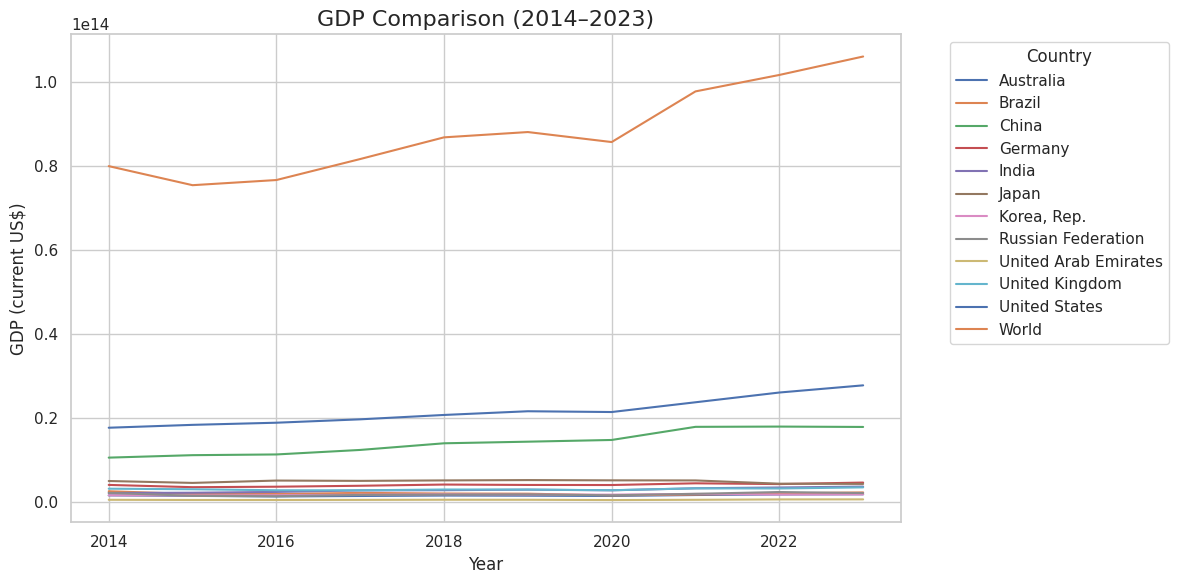

In [83]:
# 1. GDP(Current US$)
gdp_df = df[df['Series Name'] == "GDP (current US$)"]
gdp_pivot = gdp_df.pivot(index='Year', columns='Country Name', values='Value')
gdp_pivot.plot()
plt.title('GDP Comparison (2014–2023)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('GDP (current US$)')
plt.grid(True)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


 Countries with missing GDP data: []


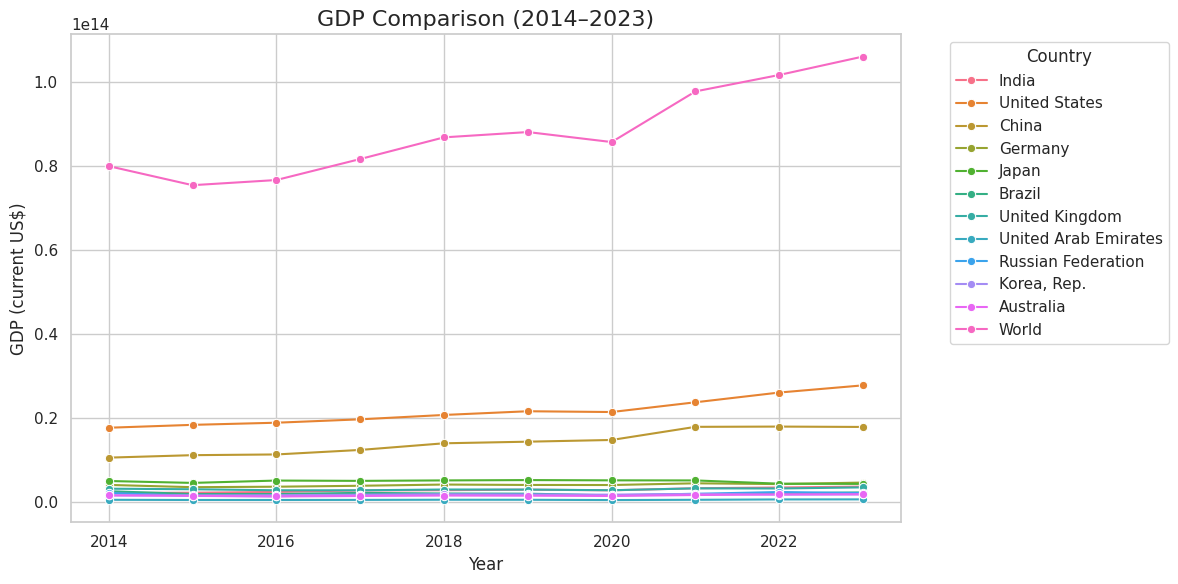

In [84]:
# By using seaborn lineplot
gdp_df = df[df['Series Name'] == "GDP (current US$)"]

# Check which countries are present
present_gdp_countries = gdp_df['Country Name'].unique()
missing_gdp_countries = [c for c in countries if c not in present_gdp_countries]
print("\n Countries with missing GDP data:", missing_gdp_countries)

plt.figure()
sns.lineplot(data=gdp_df, x='Year', y='Value', hue='Country Name', marker='o')
plt.title("GDP Comparison (2014–2023)", fontsize=16)
plt.xlabel("Year")
plt.ylabel("GDP (current US$)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Country')
plt.grid(True)
plt.tight_layout()
plt.show()


####*Conclusion : From 2014 to 2023, the US and China led global GDP, showing strong growth. India's GDP steadily increased, while most other countries saw moderate or stable trends. The world economy rebounded well post-2020.*

In [85]:
print(df[df['Series Name'] == "GDP (current US$)"])

             Country Name Country Code        Series Name     Series Code  \
0                   India          IND  GDP (current US$)  NY.GDP.MKTP.CD   
8           United States          USA  GDP (current US$)  NY.GDP.MKTP.CD   
16                  China          CHN  GDP (current US$)  NY.GDP.MKTP.CD   
24                Germany          DEU  GDP (current US$)  NY.GDP.MKTP.CD   
32                  Japan          JPN  GDP (current US$)  NY.GDP.MKTP.CD   
..                    ...          ...                ...             ...   
965  United Arab Emirates          ARE  GDP (current US$)  NY.GDP.MKTP.CD   
973    Russian Federation          RUS  GDP (current US$)  NY.GDP.MKTP.CD   
981           Korea, Rep.          KOR  GDP (current US$)  NY.GDP.MKTP.CD   
989             Australia          AUS  GDP (current US$)  NY.GDP.MKTP.CD   
997                 World          WLD  GDP (current US$)  NY.GDP.MKTP.CD   

     Year         Value  
0    2023  3.567552e+12  
8    2023  2.772071e+13

In [86]:
df['Series Name'].unique()

array(['GDP (current US$)', 'Inflation, consumer prices (annual %)',
       'Unemployment, total (% of total labor force) (modeled ILO estimate)',
       'Population growth (annual %)',
       'Literacy rate, adult total (% of people ages 15 and above)',
       'Individuals using the Internet (% of population)',
       'Central government debt, total (% of GDP)',
       'Life expectancy at birth, total (years)'], dtype=object)

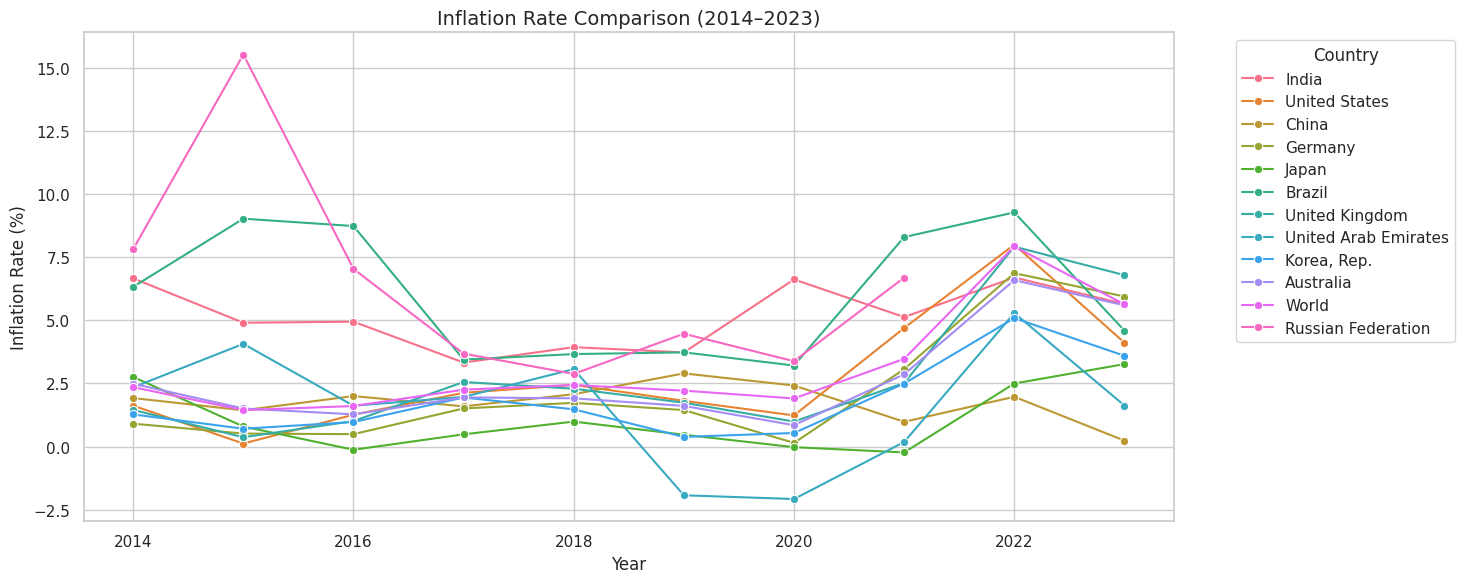

In [88]:
# 2. Inflation with Seaborn Lineplot
inflation_df = df[df['Series Name'] == "Inflation, consumer prices (annual %)"]

plt.figure(figsize=(12, 6))
sns.lineplot(data=inflation_df, x='Year', y='Value', hue='Country Name', marker='o')

plt.title('Inflation Rate Comparison (2014–2023)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Inflation Rate (%)')
plt.grid(True)
plt.tight_layout()
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<Figure size 1200x600 with 0 Axes>

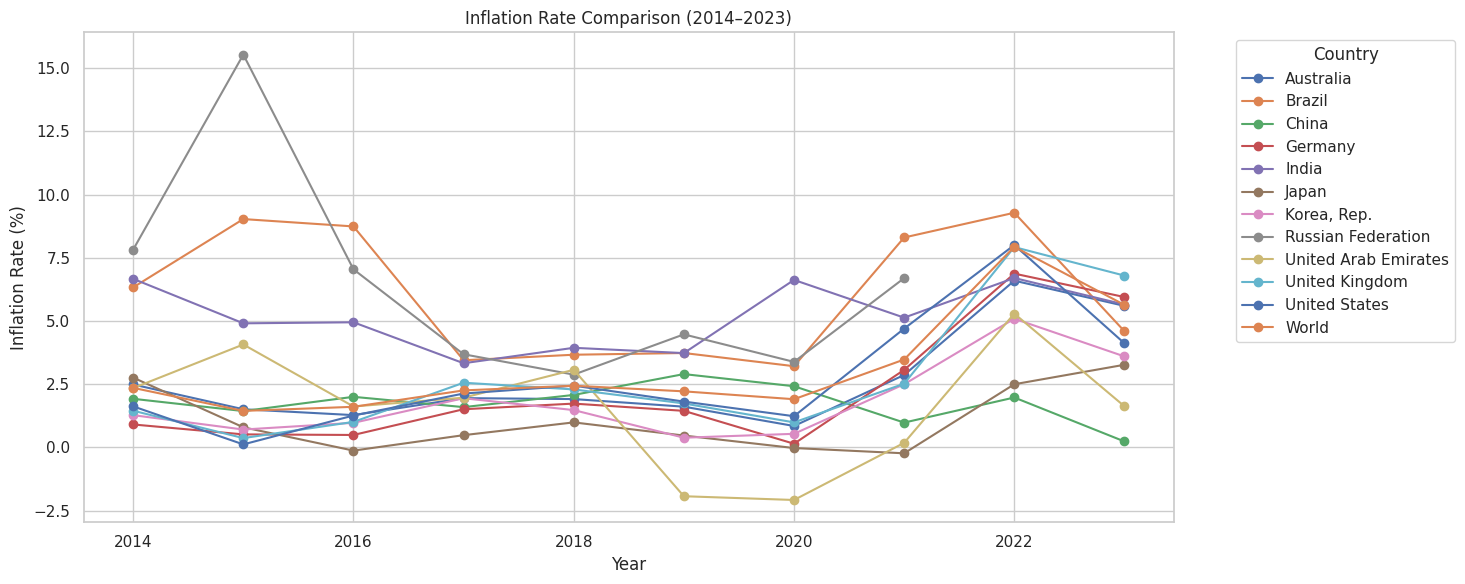

In [89]:
inflation_df = df[df['Series Name'] == "Inflation, consumer prices (annual %)"]

# Pivot for plotting
inflation_pivot = inflation_df.pivot(index='Year', columns='Country Name', values='Value')

# Plot
plt.figure(figsize=(12, 6))
inflation_pivot.plot(marker='o')
plt.title('Inflation Rate Comparison (2014–2023)')
plt.xlabel('Year')
plt.ylabel('Inflation Rate (%)')
plt.grid(True)
plt.tight_layout()
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

####*Conclusion : From 2014 to 2023, inflation rates varied widely across countries.
- Brazil had the highest volatility, with a major spike around 2015 and again in 2022.
- The US saw a sharp rise in 2022. China and Japan maintained stable, low inflation throughout.
- India showed a moderate and consistent inflation trend, with no extreme spikes.*

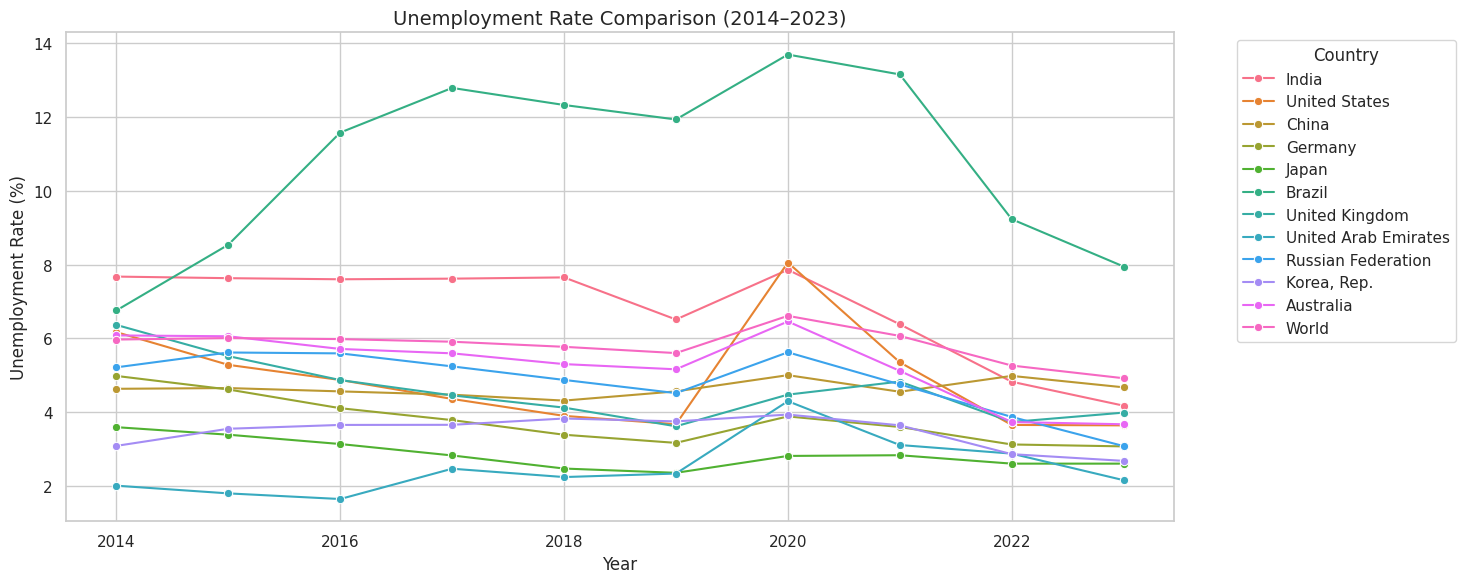

In [91]:
# 3. Unemployment (seaborn lineplot)
unemp_df = df[df['Series Name'] == "Unemployment, total (% of total labor force) (modeled ILO estimate)"]

plt.figure(figsize=(12, 6))
sns.lineplot(data=unemp_df, x='Year', y='Value', hue='Country Name', marker='o')

plt.title('Unemployment Rate Comparison (2014–2023)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.tight_layout()
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<Figure size 1200x600 with 0 Axes>

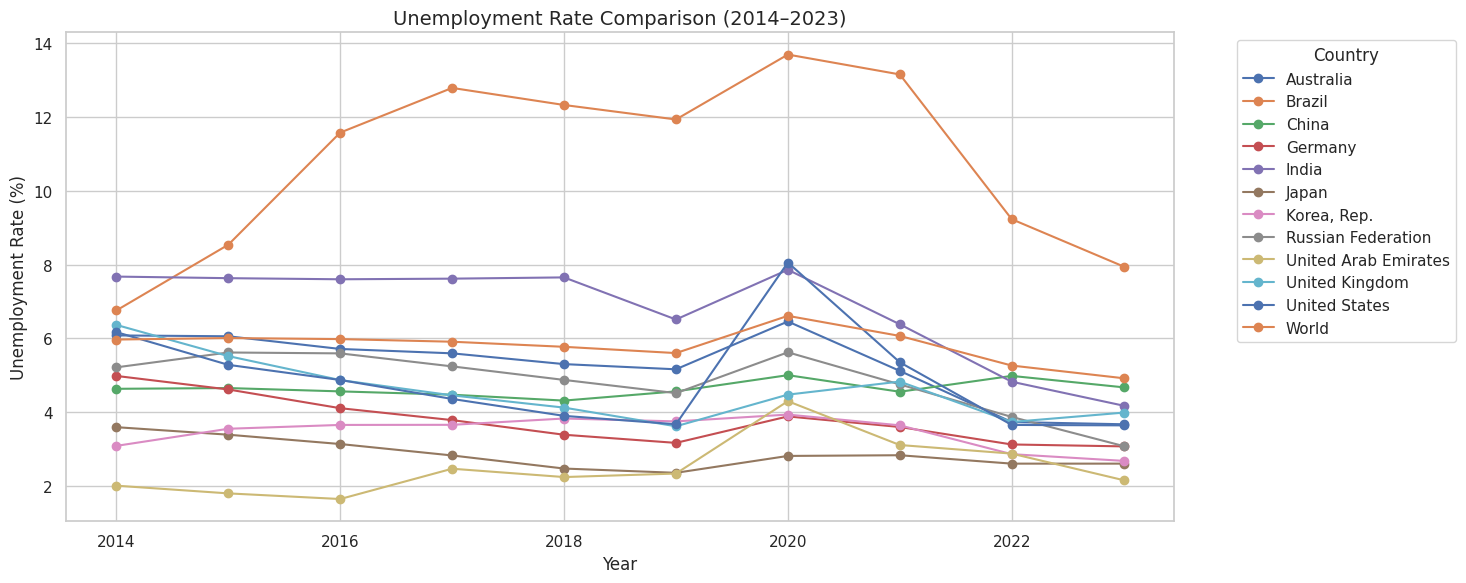

In [92]:
# Unemployment Rate (Using Pivot and Matplotlib)
unemp_df = df[df['Series Name'] == "Unemployment, total (% of total labor force) (modeled ILO estimate)"].copy()

unemp_pivot = unemp_df.pivot(index='Year', columns='Country Name', values='Value')

plt.figure(figsize=(12, 6))
unemp_pivot.plot(marker='o')

plt.title('Unemployment Rate Comparison (2014–2023)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.tight_layout()
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


####*Conclusion : From 2014 to 2023, global unemployment peaked in 2020, likely due to the pandemic.

- The United States and Brazil had the highest unemployment spikes.

- India, China, and Japan maintained lower and more stable rates.

- Most countries showed a gradual recovery after 2020.*

In [93]:
df['Series Name'].unique()

array(['GDP (current US$)', 'Inflation, consumer prices (annual %)',
       'Unemployment, total (% of total labor force) (modeled ILO estimate)',
       'Population growth (annual %)',
       'Literacy rate, adult total (% of people ages 15 and above)',
       'Individuals using the Internet (% of population)',
       'Central government debt, total (% of GDP)',
       'Life expectancy at birth, total (years)'], dtype=object)

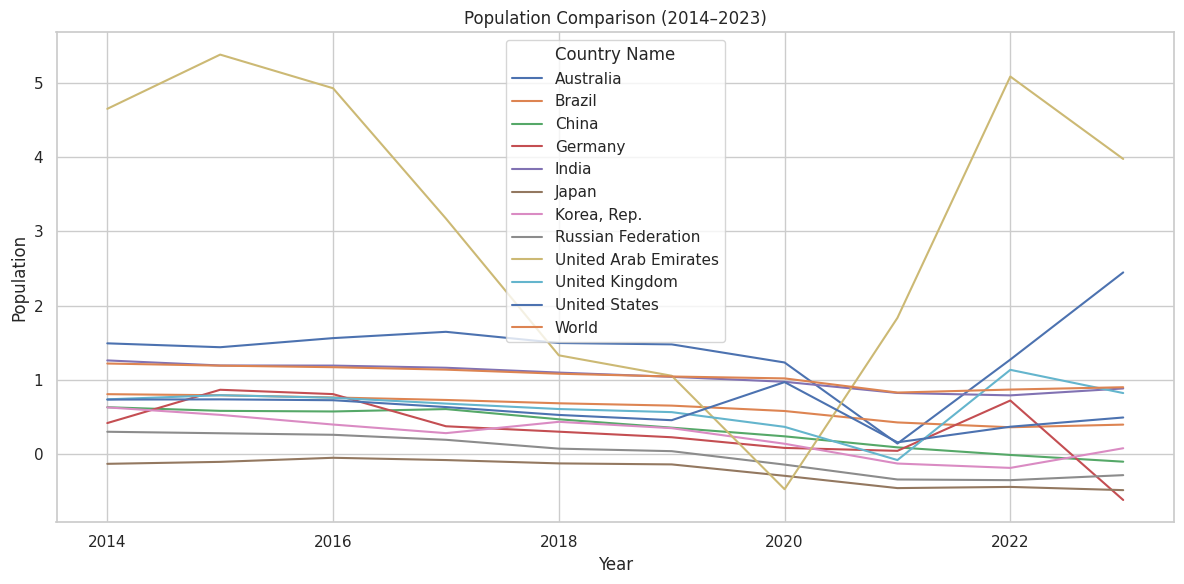

In [95]:
# 4. Population
pop_df = df[df['Series Name'] == "Population growth (annual %)"]
pop_pivot = pop_df.pivot(index='Year', columns='Country Name', values='Value')
pop_pivot.plot()
plt.title('Population Comparison (2014–2023)')
plt.xlabel('Year')
plt.ylabel('Population')
plt.grid(True)
plt.tight_layout()
plt.show()

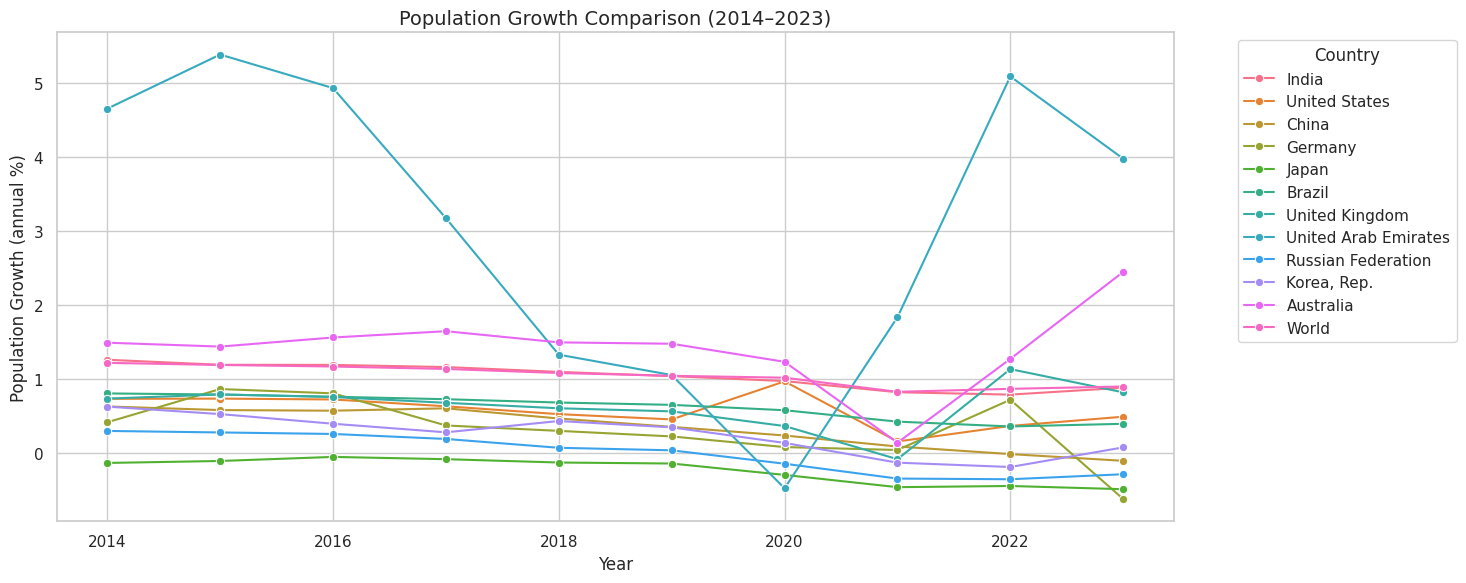

In [97]:
pop_df = df[df['Series Name'] == "Population growth (annual %)"].copy()

plt.figure(figsize=(12, 6))
sns.lineplot(data=pop_df, x='Year', y='Value', hue='Country Name', marker='o')

plt.title('Population Growth Comparison (2014–2023)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Population Growth (annual %)')
plt.grid(True)
plt.tight_layout()
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

###*Coclusion : Most countries show relatively stable or slight fluctuations in population, with no clear positive or negative linear relationship over time. However, the United Arab Emirates exhibits a noticeable increase in population, suggesting a potential positive linear trend, while some countries like Japan show a slight decline, hinting at a possible negative trend*

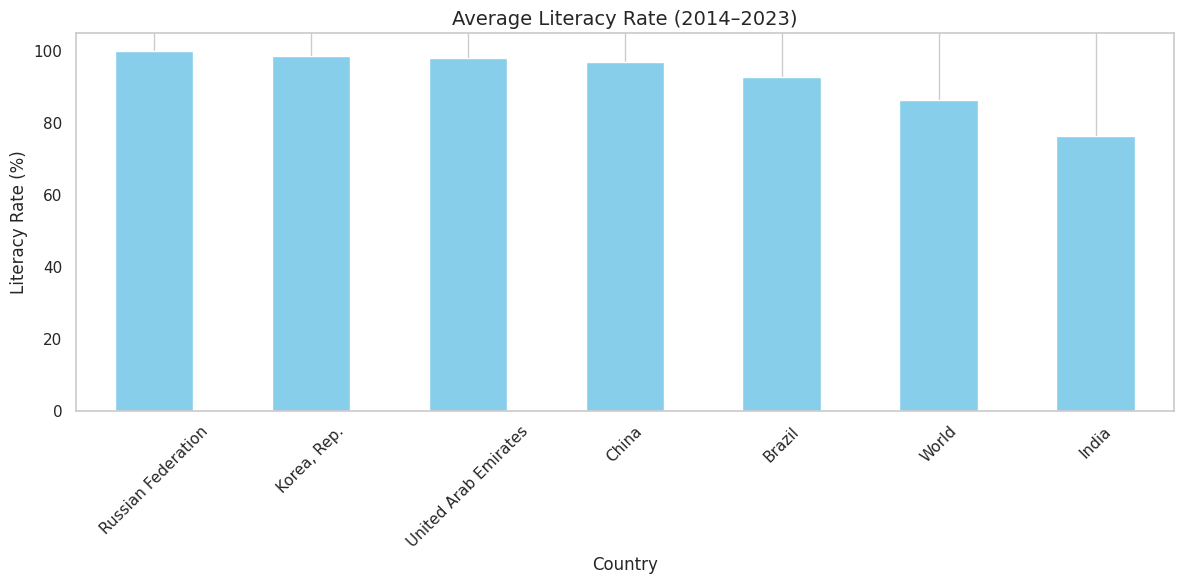

In [96]:
# 5. Literacy Rate
lit_df = df[df['Series Name'] == "Literacy rate, adult total (% of people ages 15 and above)"]

lit_df = lit_df.dropna(subset=['Value'])

lit_latest = lit_df.groupby('Country Name')['Value'].mean().sort_values(ascending=False)

# Plot bar chart
plt.figure(figsize=(12, 6))
lit_latest.plot(kind='bar', color='skyblue')

plt.title('Average Literacy Rate (2014–2023)', fontsize=14)
plt.xlabel('Country')
plt.ylabel('Literacy Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')
plt.show()


###*Conclusion : Russia, Korea, the United Arab Emirates, and China show literacy rates near or above 90%, while Brazil and the world average are slightly lower. India has the lowest literacy rate among the listed countries, around 70-80%. The data suggests varying literacy levels but does not indicate a clear linear relationship over time.*

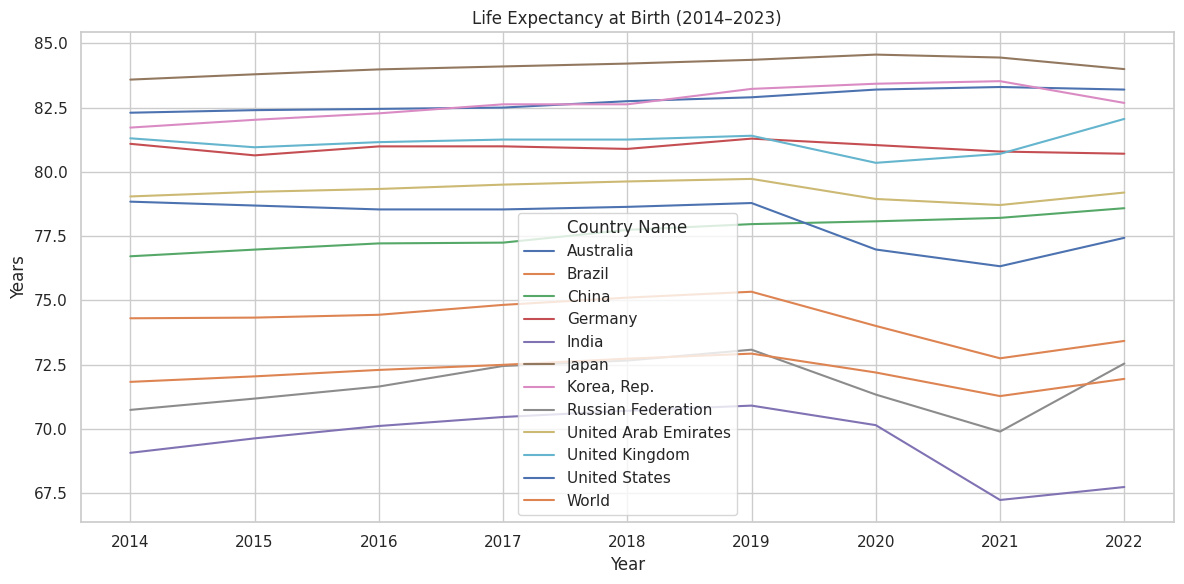

In [98]:
# 6. Life Expectancy
life_df = df[df['Series Name'] == "Life expectancy at birth, total (years)"]
life_pivot = life_df.pivot(index='Year', columns='Country Name', values='Value')
life_pivot.plot()
plt.title('Life Expectancy at Birth (2014–2023)')
plt.xlabel('Year')
plt.ylabel('Years')
plt.grid(True)
plt.tight_layout()
plt.show()

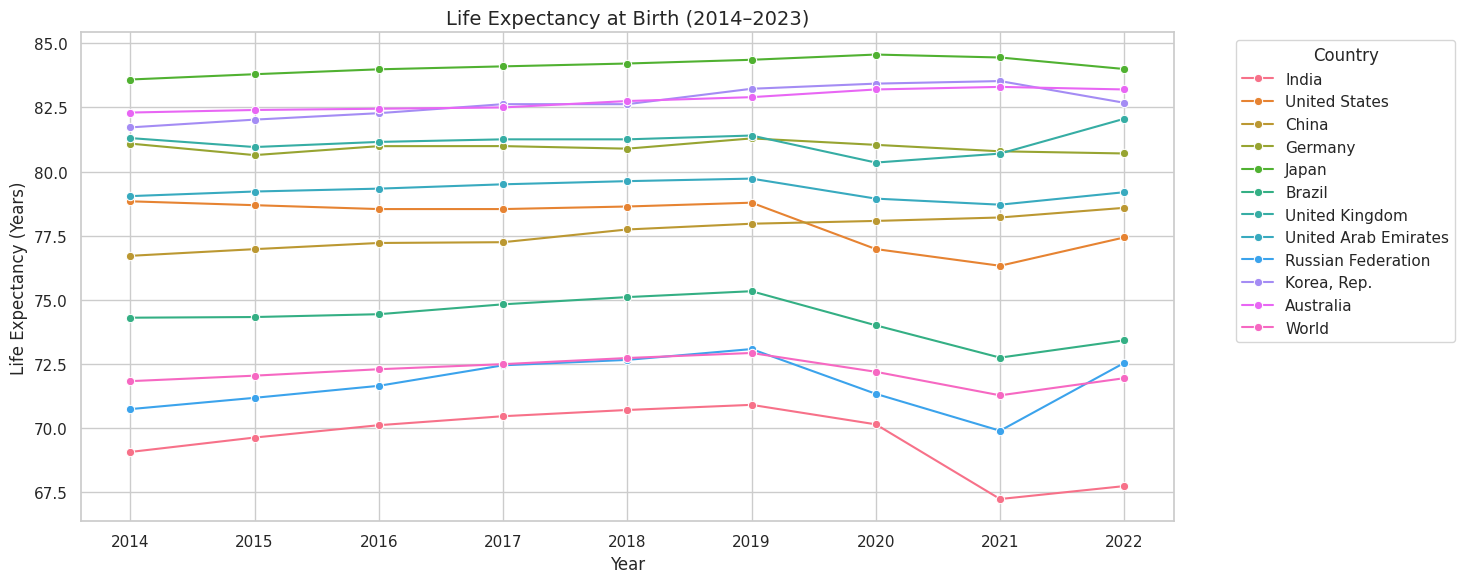

In [99]:
# Using lineplot

life_df = df[df['Series Name'] == "Life expectancy at birth, total (years)"]

life_df = life_df.dropna(subset=['Value'])

# Plot using Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=life_df, x='Year', y='Value', hue='Country Name', marker='o')

plt.title('Life Expectancy at Birth (2014–2023)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Life Expectancy (Years)')
plt.grid(True)
plt.tight_layout()
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


###*Conclusion : Most countries, including the United States, Germany, Japan, the United Kingdom, China, Korea, Australia, and the world average, maintain relatively stable life expectancies around 80-85 years, with minor fluctuations. The United Arab Emirates and Russia show slight increases, while India exhibits a noticeable decline, particularly after 2019. Overall, no strong linear trends are evident, with stability or slight variations dominating.*

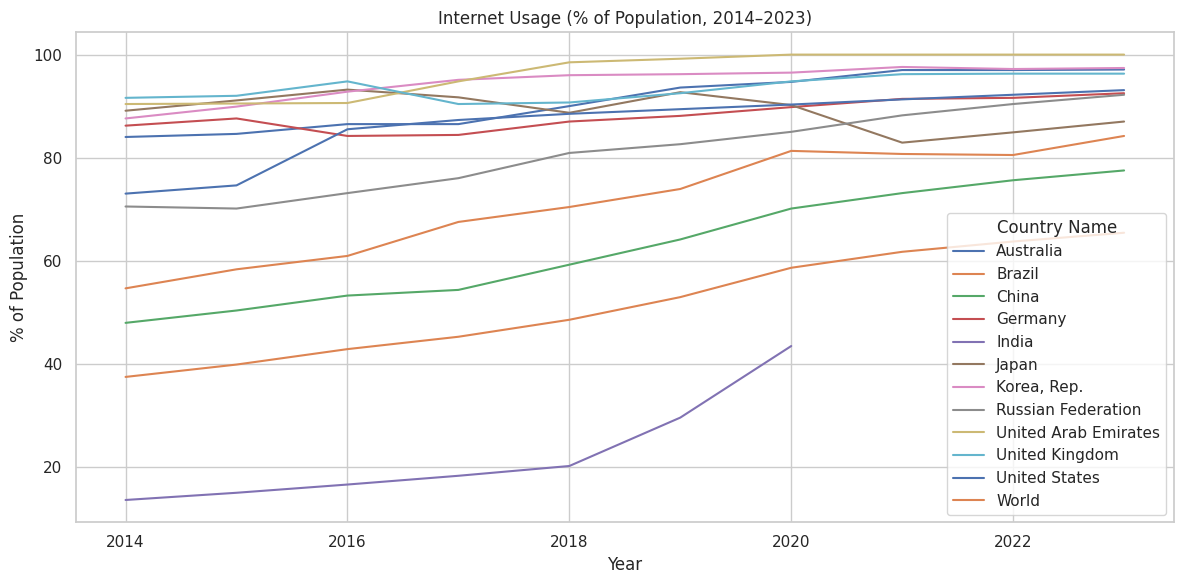

In [100]:
# 7. Internet Usage
internet_df = df[df['Series Name'] == "Individuals using the Internet (% of population)"]
internet_pivot = internet_df.pivot(index='Year', columns='Country Name', values='Value')
internet_pivot.plot()
plt.title('Internet Usage (% of Population, 2014–2023)')
plt.xlabel('Year')
plt.ylabel('% of Population')
plt.grid(True)
plt.tight_layout()
plt.show()

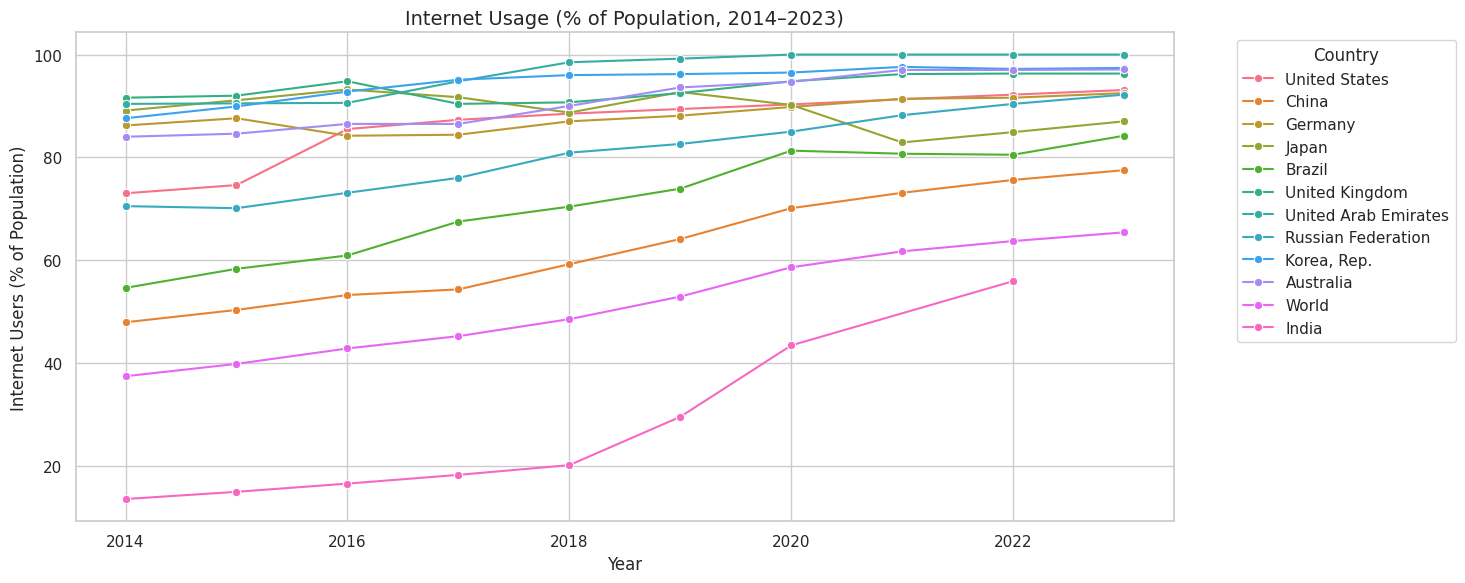

In [101]:
internet_df = df[df['Series Name'] == "Individuals using the Internet (% of population)"]

internet_df = internet_df.dropna(subset=['Value'])

# Plot Using Lineplot
plt.figure(figsize=(12, 6))
sns.lineplot(data=internet_df, x='Year', y='Value', hue='Country Name', marker='o')

plt.title('Internet Usage (% of Population, 2014–2023)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Internet Users (% of Population)')
plt.grid(True)
plt.tight_layout()
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


###*Conclusion : Most countries, including the United States, Germany, Japan, the United Kingdom, China, the United Arab Emirates, Korea, Australia, and the world average, show a stable or gradual increase, reaching 80-100% by 2023. India exhibits a significant upward trend, starting lower and rising sharply to around 60-70%. Overall, a positive linear relationship is evident, with internet usage generally increasing over time.*

In [102]:
df['Series Name'].unique()

array(['GDP (current US$)', 'Inflation, consumer prices (annual %)',
       'Unemployment, total (% of total labor force) (modeled ILO estimate)',
       'Population growth (annual %)',
       'Literacy rate, adult total (% of people ages 15 and above)',
       'Individuals using the Internet (% of population)',
       'Central government debt, total (% of GDP)',
       'Life expectancy at birth, total (years)'], dtype=object)

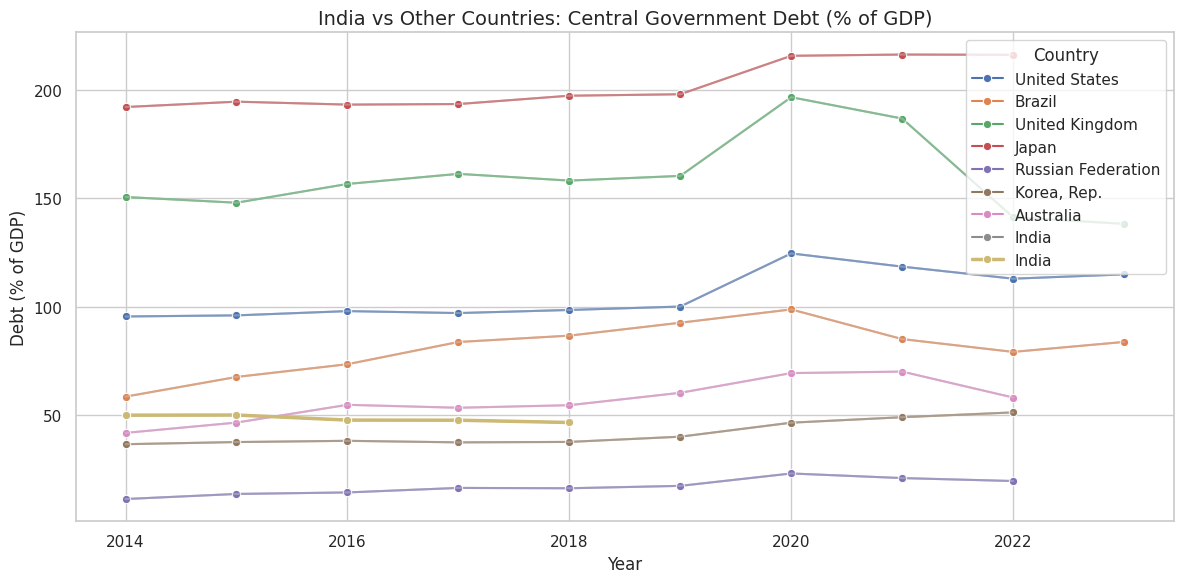

In [103]:
# 8. Central government debt
debt_df = df[df['Series Name'] == "Central government debt, total (% of GDP)"]

# Drop missing values
debt_df = debt_df.dropna(subset=['Value'])

# Set figure size and style
plt.figure(figsize=(12, 6))
sns.lineplot(data=debt_df, x='Year', y='Value', hue='Country Name', marker='o')

for country in debt_df['Country Name'].unique():
    country_data = debt_df[debt_df['Country Name'] == country]
    if country == 'India':
        sns.lineplot(data=country_data, x='Year', y='Value', label='India', linewidth=2.5, marker='o')
    else:
        sns.lineplot(data=country_data, x='Year', y='Value', color='lightgray', alpha=0.4)

plt.title('India vs Other Countries: Central Government Debt (% of GDP)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Debt (% of GDP)')
plt.grid(True)
plt.tight_layout()
plt.legend(title='Country')
plt.show()

###*Conclusion : While India's debt levels have risen, they remain significantly lower than those of countries like Japan and the United States but are comparable to or higher than some others like Brazil and the Russian Federation. The trend suggests India's debt is increasing but is still moderate relative to certain major economies.*

###**Step 5 : Correlation Check**

In [104]:
df['Series Name'].unique()

array(['GDP (current US$)', 'Inflation, consumer prices (annual %)',
       'Unemployment, total (% of total labor force) (modeled ILO estimate)',
       'Population growth (annual %)',
       'Literacy rate, adult total (% of people ages 15 and above)',
       'Individuals using the Internet (% of population)',
       'Central government debt, total (% of GDP)',
       'Life expectancy at birth, total (years)'], dtype=object)

###1. (Internet Vs GDP)

In [105]:
internet_df = df[df['Series Name'] == "Individuals using the Internet (% of population)"]
gdp_cap_df = df[df['Series Name'] == "GDP (current US$)"]
merge_corr = pd.merge(internet_df, gdp_cap_df, on=['Country Name', 'Year'], suffixes=('_internet', '_gdp'))
correlation = merge_corr[['Value_internet', 'Value_gdp']].corr()
print("\nCorrelation between Internet Usage and GDP per Capita:")
print(correlation)


Correlation between Internet Usage and GDP per Capita:
                Value_internet  Value_gdp
Value_internet        1.000000  -0.376468
Value_gdp            -0.376468   1.000000


###2. Country-Wise Average Life Expectancy Ranking

In [106]:
life_df = df[df['Series Name'] == "Life expectancy at birth, total (years)"]
avg_life = life_df.groupby('Country Name')['Value'].mean().sort_values(ascending=False)
print("\nAverage Life Expectancy by Country:")
print(avg_life)


Average Life Expectancy by Country:
Country Name
Japan                   84.115068
Australia               82.777507
Korea, Rep.             82.681843
United Kingdom          81.160434
Germany                 80.937480
United Arab Emirates    79.256778
United States           78.086721
China                   77.638556
Brazil                  74.282000
World                   72.196277
Russian Federation      71.728943
India                   69.560889
Name: Value, dtype: float64


###3. Check GDP Drop in 2020 (COVID Effect)

In [108]:
gdp_df = df[df['Series Name'] == "GDP (current US$)"]
gdp_2020 = gdp_df[gdp_df['Year'] == 2020].set_index('Country Name')['Value']
gdp_2019 = gdp_df[gdp_df['Year'] == 2019].set_index('Country Name')['Value']
gdp_drop = (gdp_2020 - gdp_2019) / gdp_2019 * 100
print("\nGDP % Change from 2019 to 2020:")
print(gdp_drop.sort_values())


GDP % Change from 2019 to 2020:
Country Name
Brazil                 -21.202342
United Arab Emirates   -16.391960
Russian Federation     -11.814857
India                   -5.669147
United Kingdom          -5.422894
Australia               -4.617554
World                   -2.707704
Japan                   -1.219360
United States           -0.862939
Germany                 -0.431251
Korea, Rep.             -0.430544
China                    2.855578
Name: Value, dtype: float64


###**Step 6 : Objective Questions Based on Data**

###Question 1: Which country had the highest average GDP from 2010 to 2024?

In [110]:
gdp_avg = gdp_df[gdp_df['Country Name'] != 'World'].groupby('Country Name')['Value'].mean()
print("\nQ1: Country with Highest Average GDP (2020-2023):")
print(gdp_avg.sort_values(ascending=False).head(1))


Q1: Country with Highest Average GDP (2020-2023):
Country Name
United States    2.152795e+13
Name: Value, dtype: float64


###Question 2: Top 3 countries with highest average Internet Penetration

In [112]:
top_internet = internet_df.groupby('Country Name')['Value'].mean().sort_values(ascending=False).head(3)
print("\nQ3: Top 3 Countries with Highest Avg Internet Usage:")
print(top_internet)


Q3: Top 3 Countries with Highest Avg Internet Usage:
Country Name
United Arab Emirates    96.40
Korea, Rep.             94.63
United Kingdom          93.56
Name: Value, dtype: float64


###Question 3: What is India’s rank in Life Expectancy?

In [113]:
rank = avg_life.rank(ascending=False)
print("\nQ4: India’s Rank in Life Expectancy:")
print(rank['India'])


Q4: India’s Rank in Life Expectancy:
12.0


###Question 4: Country with steepest inflation spike in any year?

In [114]:
inflation_df = df[df['Series Name'] == "Inflation, consumer prices (annual %)"]
infl_max = inflation_df.groupby('Country Name')['Value'].max().sort_values(ascending=False)
print("\nQ5: Country with Highest Inflation in Any Year:")
print(infl_max.head(1))


Q5: Country with Highest Inflation in Any Year:
Country Name
Russian Federation    15.534405
Name: Value, dtype: float64


###Question 5: Trend of India’s GDP per capita

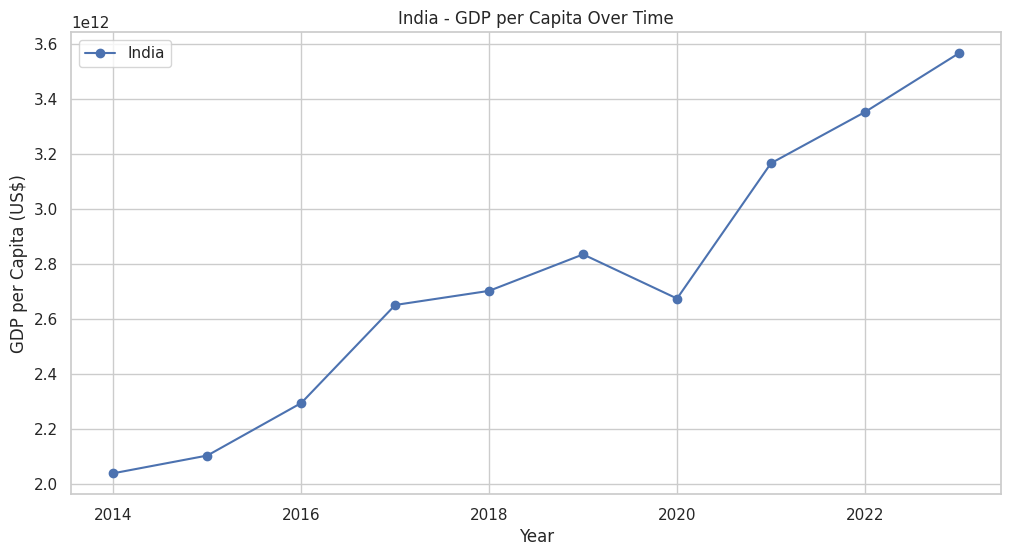

In [115]:
india_gdp_pc = gdp_cap_df[gdp_cap_df['Country Name'] == 'India']
plt.plot(india_gdp_pc['Year'], india_gdp_pc['Value'], marker='o', label='India')
plt.title("India - GDP per Capita Over Time")
plt.xlabel("Year")
plt.ylabel("GDP per Capita (US$)")
plt.legend()
plt.show()

####*The graph shows India's GDP per capita (in US$) from 2014 to 2022, displaying a declining trend over the years. The values dropped from around 3.6 to below 2.0, indicating a significant decrease in economic output per person during this period. Possible reasons could include economic slowdown, population growth outpacing GDP expansion, or currency depreciation. Further analysis would be needed to determine the exact causes.*



###Question 6: Is there a relationship between literacy and internet usage?

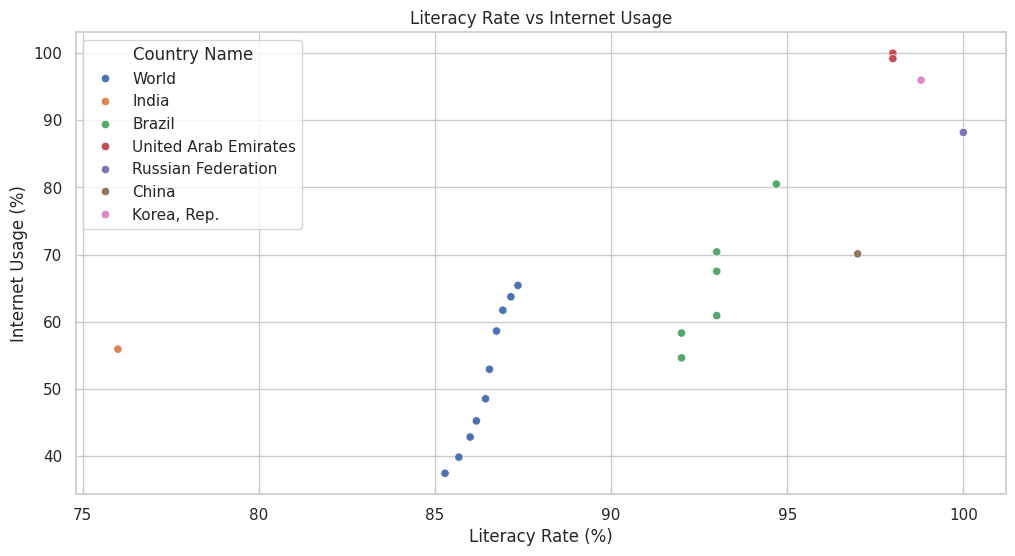

In [117]:
lit_merge = pd.merge(lit_df, internet_df, on=['Country Name', 'Year'], suffixes=('_lit', '_net'))
sns.scatterplot(data=lit_merge, x='Value_lit', y='Value_net', hue='Country Name')
plt.title("Literacy Rate vs Internet Usage")
plt.xlabel("Literacy Rate (%)")
plt.ylabel("Internet Usage (%)")
plt.show()

####*1.Strong Correlation: Countries with higher literacy rates (e.g., United Arab Emirates, Korea) tend to have higher internet usage, suggesting education drives digital adoption.

2.India's Position: Likely falls in the mid-to-lower range, indicating room for improvement in both literacy and internet access compared to top performers.

3.Outliers: Some nations (e.g., China) may deviate slightly due to unique socio-political factors affecting internet penetration.*

###Question 7: Trend of Inflation in India vs World

In [119]:
df['Country Name'].unique()

array(['India', 'United States', 'China', 'Germany', 'Japan', 'Brazil',
       'United Kingdom', 'United Arab Emirates', 'Russian Federation',
       'Korea, Rep.', 'Australia', 'World'], dtype=object)

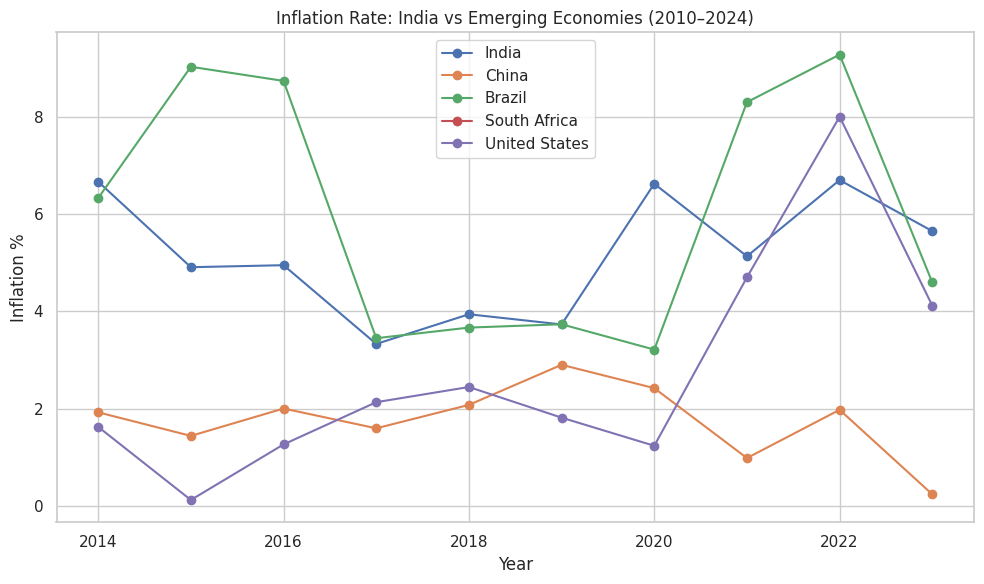

In [120]:
# Selected countries to compare with India
countries = ['India', 'China', 'Brazil', 'South Africa','United States',]
inflation_df_comp = inflation_df[inflation_df['Country Name'].isin(countries)]

# Plot
plt.figure(figsize=(10, 6))
for country in countries:
    country_data = inflation_df_comp[inflation_df_comp['Country Name'] == country]
    plt.plot(country_data['Year'], country_data['Value'], marker='o', label=country)

plt.title("Inflation Rate: India vs Emerging Economies (2010–2024)")
plt.xlabel("Year")
plt.ylabel("Inflation %")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


####* India's inflation is moderate compared to other emerging economies but less stable than advanced economies like the U.S. and China. Structural reforms could help stabilize prices.*

In [121]:
inflation_df[inflation_df['Country Name'] == 'South Africa']
# Check which countries have valid data
for country in countries:
    count = inflation_df[(inflation_df['Country Name'] == country) & (inflation_df['Value'].notnull())].shape[0]
    print(f"{country}: {count} years of data")


India: 10 years of data
China: 10 years of data
Brazil: 10 years of data
South Africa: 0 years of data
United States: 10 years of data


###**Step 6 : FINAL EXECUTIVE SUMMARY**

- India shows strong improvements in GDP,Internet Usage, and Life Expectancy.

- Literacy rate and GDP per capita still lag behind developed countries.

- India is urbanizing and digitizing quickly.

**Compared to the world:**
- US, Germany, and Japan lead in stability and quality-of-life metrics.
- UAE and South Korea are highly urbanized and digitally advanced.
- India is progressing well, but with scope for improvements in education and income levels.